In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

import numpy as np

In [2]:
def display_image (path:str):
    img = Image.open(path)  
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

### Handwritten Dataset Split

In [3]:
sythetic_df = pd.read_csv("../raw_data/sythetic_labels.csv")

In [4]:
sythetic_df.head(5)

,images,text
0,image_0_0.png,ሁከትና ብጥብጥ የሚያነሳሳ ቅስቀሳ እና ግንኙነት መፍጠር::
1,image_1_0.png,ይላል ከዚህ አንቀፅ በግልፅ እንደምንረዳው በህቡዕም ሆነ በግልፅ መደራጀት...
2,image_1_1.png,ለማፍረስ ከሆነ ብቻ ነው::
3,image_3_0.png,ሉቃስ ደቀ መዛሙርቱም ተመልሰው ያገኙትን ውጤት ሲነግሩት አመስግኗቸዋል ብ...
4,image_4_0.png,እምነትን በስራ መግለጥ ስራ ብቻውን ያድናል አይባልም::


In [14]:
len(sythetic_df)

297810

In [5]:
synthetic_root = "../raw_data/data/"

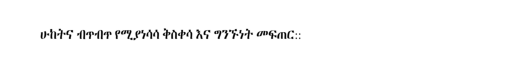

ሁከትና ብጥብጥ የሚያነሳሳ ቅስቀሳ እና ግንኙነት መፍጠር::


In [6]:
display_image(os.path.join(synthetic_root , sythetic_df.iloc[0]['images']))  
print(sythetic_df.iloc[0]['text'])

In [7]:
texts = sythetic_df['text'].tolist()

In [8]:
from collections import Counter
all_text = ''.join(texts)
char_counts = Counter(all_text)



In [9]:
sorted_counts = dict(sorted(char_counts.items(), key=lambda item: item[1], reverse=True))



In [10]:

texts = sythetic_df['text'].dropna().astype(str)
char_df = pd.DataFrame(char_counts.items(), columns=["char", "count"])

# Compute 95th percentile threshold
threshold = np.percentile(char_df['count'], 14)

# Define rare characters: strictly below 95th percentile
rare_chars = set(char_df[char_df['count'] < threshold]['char'])

# Tag rows that contain rare characters
def contains_rare_char(text):
    return any(char in rare_chars for char in text)

sythetic_df['has_rare'] = texts.apply(contains_rare_char)

# Calculate percentage
percentage = (sythetic_df['has_rare'].sum() / len(sythetic_df)) * 100
print(f"Percentage of entries with rare characters: {percentage:.2f}%")


Percentage of entries with rare characters: 2.03%


In [11]:

#seperate df with rare and non rare characters
sythetic_df_rare = sythetic_df[sythetic_df['has_rare'] == True]
sythetic_df_non_rare = sythetic_df[sythetic_df['has_rare'] == False]

In [13]:
len(sythetic_df_rare), len(sythetic_df_non_rare)

(6052, 291758)

In [13]:
sythetic_df_non_rare['type'] = 'synthetic'

/tmp/ipykernel_1490861/3837450089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sythetic_df_non_rare['type'] = 'synthetic'


In [14]:
sythetic_df_non_rare.head(5)

,images,text,has_rare,type
0,image_0_0.png,ሁከትና ብጥብጥ የሚያነሳሳ ቅስቀሳ እና ግንኙነት መፍጠር::,False,synthetic
1,image_1_0.png,ይላል ከዚህ አንቀፅ በግልፅ እንደምንረዳው በህቡዕም ሆነ በግልፅ መደራጀት...,False,synthetic
2,image_1_1.png,ለማፍረስ ከሆነ ብቻ ነው::,False,synthetic
3,image_3_0.png,ሉቃስ ደቀ መዛሙርቱም ተመልሰው ያገኙትን ውጤት ሲነግሩት አመስግኗቸዋል ብ...,False,synthetic
4,image_4_0.png,እምነትን በስራ መግለጥ ስራ ብቻውን ያድናል አይባልም::,False,synthetic


In [15]:
train_df = pd.DataFrame(columns=['image_filename', 'line_text', 'type'])

In [16]:
len(sythetic_df_non_rare)

291758

In [17]:
import os
import shutil
from PIL import Image
count = 0
possible_duplicates = []
for i in range(55478):
    source_file = (os.path.join(synthetic_root , sythetic_df_non_rare.iloc[i]['images']))  
    destination_file = os.path.join("../raw_data/Amharic_Data/train", ("synth_" + sythetic_df_non_rare.iloc[i]['images']))

    if os.path.isfile(source_file):
        shutil.copy2(source_file, destination_file)
    
    new_row = pd.DataFrame({'image_filename': ["synthetic_" + sythetic_df_non_rare.iloc[i]['images']], 
                        'line_text': [sythetic_df_non_rare.iloc[i]['text']], 
                        'type': ['synthetic']})

    # Use pd.concat to append the new row to the DataFrame
    train_df = pd.concat([train_df, new_row], ignore_index=True)
   

In [18]:
train_df.to_csv("../raw_data/Amharic_Data/train/synth_train.csv", index=False)

In [ ]:
train_df


,image_filename,line_text,type
0,synth_image_0_0.png,ሁከትና ብጥብጥ የሚያነሳሳ ቅስቀሳ እና ግንኙነት መፍጠር::,synthetic
1,synth_image_1_0.png,ይላል ከዚህ አንቀፅ በግልፅ እንደምንረዳው በህቡዕም ሆነ በግልፅ መደራጀት...,synthetic
2,synth_image_1_1.png,ለማፍረስ ከሆነ ብቻ ነው::,synthetic
3,synth_image_3_0.png,ሉቃስ ደቀ መዛሙርቱም ተመልሰው ያገኙትን ውጤት ሲነግሩት አመስግኗቸዋል ብ...,synthetic
4,synth_image_4_0.png,እምነትን በስራ መግለጥ ስራ ብቻውን ያድናል አይባልም::,synthetic


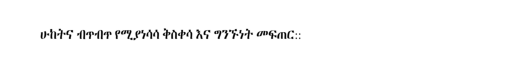

ሁከትና ብጥብጥ የሚያነሳሳ ቅስቀሳ እና ግንኙነት መፍጠር::


In [19]:
display_image(os.path.join("../raw_data/Amharic_Data/train", train_df.iloc[0]['image_filename']))
print(train_df.iloc[0]['line_text'])